<a href="https://colab.research.google.com/github/millejade/Machine-Learning/blob/main/PhillyCrimeLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [ ]:
input = 'https://courses.cs.washington.edu/courses/cse416/18sp/notebooks/Philadelphia_Crime_Rate_noNA.csv'
dataset  = pd.read_csv(input, sep=',')

In [ ]:
dataset.loc[:, ['CrimeRate', 'HousePrice']]

### All data are included

In [ ]:
input, output =  dataset[['CrimeRate']], dataset.HousePrice

In [ ]:
crime_model = LinearRegression().fit(input, output)

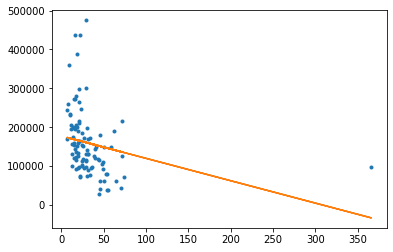

In [ ]:
plt.plot(dataset['CrimeRate'],dataset['HousePrice'],'.',
        dataset['CrimeRate'],crime_model.predict(input),'-')

### Center City is Removed

In [ ]:
data_noCenterCity = dataset[dataset['MilesPhila'] != 0.0]

In [ ]:
data_noCenterCity.loc[:, ['CrimeRate', 'HousePrice']]

In [ ]:
inputA, outputA =  data_noCenterCity[['CrimeRate']], data_noCenterCity.HousePrice

In [ ]:
crime_model_noCC = LinearRegression().fit(inputA, outputA)

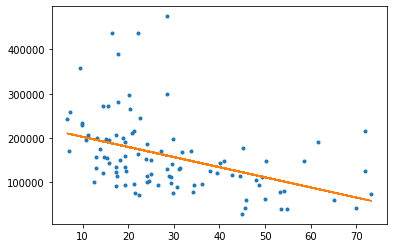

In [ ]:
plt.plot(data_noCenterCity['CrimeRate'],data_noCenterCity['HousePrice'],'.',
        data_noCenterCity['CrimeRate'],crime_model_noCC.predict(inputA),'-')

In [ ]:
print(f"intercept = {crime_model.intercept_}")
print(f"coefficient = {crime_model.coef_}")
print(f"intercept with no Center City = {crime_model_noCC.intercept_}")
print(f"coefficient with no Center City = {crime_model_noCC.coef_}")

intercept = 176629.40810695427
coefficient = [-576.90812768]
intercept with no Center City = 225233.5518390038
coefficient with no Center City = [-2288.68942995]


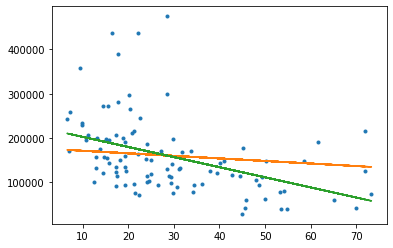

In [ ]:
plt.plot(data_noCenterCity['CrimeRate'], data_noCenterCity['HousePrice'], '.',
         data_noCenterCity['CrimeRate'], crime_model.predict(inputA), '-',
         data_noCenterCity['CrimeRate'], crime_model_noCC.predict(inputA), '-')

### High End / Outlier from 350,000 to 400,000 and above are removed

In [ ]:
sales_nohighend = data_noCenterCity[data_noCenterCity['HousePrice'] < 350000]

In [ ]:
inputB, outputB =  sales_nohighend[['CrimeRate']], sales_nohighend.HousePrice

In [ ]:
crime_model_noHighEnd = LinearRegression().fit(inputB, outputB)

In [ ]:
print(f"intercept = {crime_model.intercept_}")
print(f"coefficient = {crime_model.coef_}")
print(f"intercept with no Center City = {crime_model_noCC.intercept_}")
print(f"coefficient with no Center City = {crime_model_noCC.coef_}")
print(f"intercept with no high end = {crime_model_noHighEnd.intercept_}")
print(f"coefficient with no high end = {crime_model_noHighEnd.coef_}")

intercept = 176629.40810695427
coefficient = [-576.90812768]
intercept with no Center City = 225233.5518390038
coefficient with no Center City = [-2288.68942995]
intercept with no high end = 199098.85266980447
coefficient with no high end = [-1838.56264859]


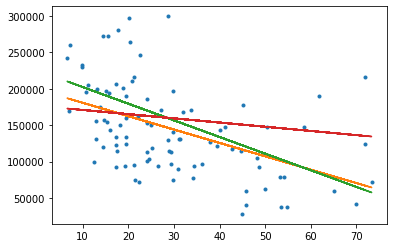

In [ ]:
plt.plot(sales_nohighend['CrimeRate'], sales_nohighend['HousePrice'], '.',
         sales_nohighend['CrimeRate'], crime_model_noHighEnd.predict(inputB), '-',
         sales_nohighend['CrimeRate'], crime_model_noCC.predict(inputB), '-',
         sales_nohighend['CrimeRate'], crime_model.predict(inputB), '-',)         

`RED LINE` : Regression line with all datapoints are included

`ORANGE LINE` : Regression line with no Center City and high end outliers

`GREEN LINE` : Regression line with no Center City



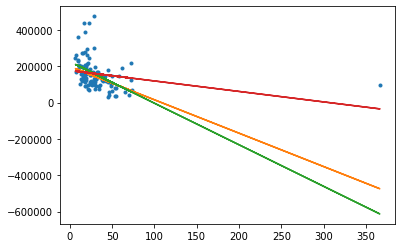

In [ ]:
plt.plot(dataset['CrimeRate'], dataset['HousePrice'], '.',
         dataset['CrimeRate'], crime_model_noHighEnd.predict(input), '-',
         dataset['CrimeRate'], crime_model_noCC.predict(input), '-',
         dataset['CrimeRate'], crime_model.predict(input), '-',)    